---
<a name = Section1></a>
# **1. Introduction**

- Company Name - XXXX
- XXXX is going to float a stock trading facility for their existing customers.
- The idea is to use data to classify whether a customer belongs to a **high
  net worth(1) or low net worth(2) group.**
- They will have to incentivize their customers to adopt their offerings.
- One way to incentivize is to offer discounts on the commission for trading    transactions.

---
<a name = Section2></a>
# **2. Problem Statement**
---

The current process suffers from the following problems:

- One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.
- The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

Project Deliverables -
- Deliverable: Predict whether a customer belongs to a high net worth or low net worth group.

- Machine Learning Task: Classification
- Target Variable: Status (high net worth (1) / low net
 worth (2))

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 22.5 MB/s eta 0:00:00


<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

<ipython-input-2-cc13dadcf98b>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

The dataset contains all the necessary information about the customers like their occupation, family income, gender, region, balance transfer, children, etc.

Also included in the dataset is the column Revenue_Grid which classifies the customers into high net worth customers (1) and low net worth customers (2).



The Dataset contains the following columns:

Column Name	Description -

1. REF_NO - Reference Number of the customer.
2. children -	Number of children each customer has.
3.Age_band-	Age Group to which the customer belongs.
4.status-	Marital Status of the customer.
5.occupation-	Job or profession of the customer.
6.occupation_partner-	Job or profession of the customer's partner.
7.home_status-	Home Status of the customers.
8.family_income-	Income Range of the customer's family.
9.self_employed	- Whether self-employed or not.
10.self_employed_partner-	Whether the partner self-employed or not.
11.year_last_moved -	Moving Year from the last location of the customer.
12.TVarea -	Television Region of the customer.
13.post_code -	Postal Code of the customer.
14.post_area -	Postal Area of the customer.
15.Average_Credit_Card_Transaction -	Average Credit Card Transaction per year by the customer.
16.Balance_Transfer -	Transfer of the Balance in an account to another account by the customer.
17.Term_Deposit-	Cash Investment Help at Financial Institute provided to the customer.
18.Life_Insurance -	Basic Life Insurance Coverage of the customer.
19.Medical_Insurance-	Medical Insurance Coverage of the customer.
20.Average_A/C_Balance-	Average Balance in the account of the customer.
21.Personal_Loan-	Amount of Personal Loan taken by the customer.
22.Investment_in_Mutual_Fund-	Amount Invested in Mutual Funds by the customer.
23.Investment_Tax_Saving_Bond-	Amount Invested in Tax Saving Bond by the customer.
24.Home_Loan-	Amount of Home Loan taken by the customer.
25.Online_Purchase_Amount-	Amount spent by the customer on online purchases.
26.gender-	Gender of the customer.
27.region-	Religion of the customer.
28.Investment_in_Commudity-	Amount Invested in Commodity by the customer.
29.Investment_in_Equity-	Amount Invested in Equity by the customer.
30.Investment_in_Derivative	Amount- Invested in Derivatives by the customer.
31.Portfolio_Balance-	Balanced Investment Strategy of the customer.
32.Revenue_Grid-	Grid report of the customers.

In [ ]:
!unzip '/content/Customer-classification.zip'

Archive:  /content/Customer-classification.zip
  inflating: sample_submission.csv   
  inflating: existing_base_test.csv  
  inflating: existing_base_train.csv  


In [ ]:
data = pd.read_csv('/content/existing_base_train.csv')
print(data.shape)
data.head()

(8124, 32)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,Female,North West,151.55000,81.79000,136.02000,360.37000,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,Female,North West,44.28000,13.91000,29.23000,89.22000,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00000,24.46000,0.00000,18.44000,0.00000,0.00000,0.02000,10.46000,0.00000,0.00000,0.00000,Female,South West,8.58000,1.75000,4.82000,14.50000,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99000,0.00000,0.00000,0.00000,29.99000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Female,Scotland,15.00000,0.00000,5.00000,68.98000,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.98000,0.00000,0.00000,0.00000,Female,Unknown,0.00000,1.66000,1.66000,1.88000,2


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

**Observations** -
- Our DataSet has 8124 observations across 32 features.
- REF_NO feature can be removed.
- Dtype of 'children' need to be checked
- No missing value in our Data
- **Revenue_Grid** is our 'Target Feature'

<a name = Section42></a>
### **4.2 Data Discription**

- In this section we will get **information about the continous data** and see some observations.

In [ ]:
data.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000,8124.00000
mean,5797.34330,1967.87691,23.25109,46.08292,27.28465,65.31794,18.82620,31.83802,25.41583,41.72363,6.05725,4.41691,19.19866,36.15275,21.44248,31.53065,89.35337,1.89414
std,3322.49757,182.56379,51.14750,79.08469,54.13354,95.76245,32.02233,45.24944,85.13015,64.41602,12.67337,9.94575,92.34313,42.47495,32.26166,39.48066,108.30354,0.30768
min,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-78.43000,1.00000
25%,2924.75000,1978.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8.28250,4.66000,8.74000,26.27750,2.00000
50%,5811.50000,1988.00000,0.00000,17.48500,0.00000,31.47500,0.01000,14.98000,0.00000,23.48000,0.00000,0.00000,0.00000,23.59000,12.82000,21.14000,65.56000,2.00000
75%,8681.50000,1994.00000,23.48000,64.99000,34.49000,92.88750,26.97000,45.92250,20.82750,59.44000,5.49000,4.49000,7.48000,49.79500,27.97250,42.39250,123.97000,2.00000
max,11518.00000,1999.00000,662.26000,2951.76000,784.82000,2930.41000,591.04000,626.24000,4905.93000,2561.27000,156.87000,162.35000,4306.42000,1231.09000,1279.10000,1771.16000,4283.56000,2.00000


In [ ]:
data.skew()

REF_NO                             -0.01280
year_last_moved                   -10.63967
Average_Credit_Card_Transaction     3.76115
Balance_Transfer                    8.17373
Term_Deposit                        4.17416
Life_Insurance                      5.50938
Medical_Insurance                   3.36194
Average_A/C_Balance                 2.68999
Personal_Loan                      26.15960
Investment_in_Mutual_Fund           9.66725
Investment_Tax_Saving_Bond          3.19171
Home_Loan                           3.97766
Online_Purchase_Amount             21.76395
Investment_in_Commudity             4.81612
Investment_in_Equity               11.52491
Investment_in_Derivative           12.46231
Portfolio_Balance                   8.89547
Revenue_Grid                       -2.56268
dtype: float64

**Observaitons**-
- REF NO is unique.
- We have outliers in year_last moved with 0 value.
- 'children' column we will change the dtype.
- Average Credit Card Trans. is 23£ whereas median is 0.
  Which means lots of people might not be using the CC.
  Also the max CC Trans. is 662.
- Average balance tranfer is 46 whereas median is 17. Looks like we have potential outliers in our Dataset
- We will check each column one-by-one

- We have very **High Skewness** for Personal_Loan,Online Purchase Amount.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

In [ ]:
#Lets do Pandas Pre Profiling for better Understanding of the variables

In [ ]:
#profile = ProfileReport(df = data)
#profile.to_file(output_file = 'Pre Profiling Report.html')
#print('Accomplished!')

In [ ]:
#from google.colab import files
#files.download('Pre Profiling Report.html')

<a name = Section52></a>
### **5.2 Identification & Handling of Missing Data if any**

- In this section we will **analyze** and **identify** **missing information** such as **null data** and **Unknown data**.

In [ ]:
data.head(10)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,Female,North West,151.55000,81.79000,136.02000,360.37000,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,Female,North West,44.28000,13.91000,29.23000,89.22000,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00000,24.46000,0.00000,18.44000,0.00000,0.00000,0.02000,10.46000,0.00000,0.00000,0.00000,Female,South West,8.58000,1.75000,4.82000,14.50000,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99000,0.00000,0.00000,0.00000,29.99000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Female,Scotland,15.00000,0.00000,5.00000,68.98000,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.98000,0.00000,0.00000,0.00000,Female,Unknown,0.00000,1.66000,1.66000,1.88000,2
5,3309,Zero,45-50,Partner,Secretarial/Admin,Business Manager,Own Home,">=35,000",No,No,1984,Ulster,BT17 9NA,BT17,9.49000,0.01000,0.00000,0.51000,55.89000,0.00000,28.98000,0.00000,0.00000,0.00000,0.00000,Female,Northern Ireland,13.18000,4.83000,14.23000,33.62000,2
6,6610,Zero,36-40,Partner,Secretarial/Admin,Secretarial/Admin,Own Home,"<30,000, >=27,500",Yes,No,1986,Central,B62 8TF,B62,9.99000,0.00000,0.00000,0.00000,0.00000,26.96000,22.99000,80.42000,1.00000,3.99000,5.49000,Female,West Midlands,2.00000,23.48000,21.90000,13.12000,2
7,10621,Zero,61-65,Partner,Retired,Retired,Own Home,"<20,000, >=17,500",No,No,1998,Granada,PR8 2TY,PR8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,29.95000,0.00000,0.00000,0.00000,Male,North West,0.00000,4.99000,4.99000,15.74000,2
8,2630,1,45-50,Partner,Professional,Professional,Own Home,">=35,000",No,No,1980,Unknown,CF15 9TH,CF15,0.00000,82.96000,0.00000,40.47000,12.49000,0.00000,28.97000,0.00000,0.00000,0.00000,0.00000,Female,Unknown,27.18000,4.83000,13.66000,36.05000,2
9,9356,3,36-40,Partner,Professional,Housewife,Own Home,"<27,500, >=25,000",Yes,No,1997,Meridian,M13 9BG,M13,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,15.99000,0.00000,24.47000,0.00000,0.00000,Male,North West,0.00000,6.74000,6.74000,8.60000,2


In [ ]:
#children

In [ ]:
data['children'].value_counts()

Zero    4991
1       1474
2       1271
3        375
4+        13
Name: children, dtype: int64

In [ ]:
#We can replace 'Zero' with 0 and 4+ with 4

In [ ]:
data['children'] = data['children'].replace('Zero', '0')
data['children'] = data['children'].replace('4+','4')


In [ ]:
# We can observe there are Columns which have Unknown values. Lets check which all columns have Unknown values

In [ ]:
unknown_mask = (data == 'Unknown')

# Creating a DataFrame that shows the count of 'Unknown' values in each column
unknown_count = unknown_mask.sum()

# Filter out columns with at least one 'Unknown' value
columns_with_unknown = unknown_count[unknown_count > 0].index.tolist()

print("Columns with 'Unknown' values:")
print(columns_with_unknown)

Columns with 'Unknown' values:
['age_band', 'status', 'occupation', 'occupation_partner', 'family_income', 'TVarea', 'gender', 'region']


In [ ]:
#Lets replace the 'Unknown' with Col_name +'Unknown'

In [ ]:
columns_with_unknown = ['age_band','status', 'occupation', 'occupation_partner', 'family_income', 'TVarea','gender','region']

for col in columns_with_unknown:
    data[col] = data[col].replace('Unknown', 'Unknown_' + col)

**Observations** -
- Children dtype and typos have been done.
- There were lot of 'Unknown' values, i have replaced them with the column_name + 'Unknown'.
- Since they can be a potential data so we are not removing it.

In [ ]:
data.head(2)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,Female,North West,151.55000,81.79000,136.02000,360.37000,2
1,9091,0,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,Female,North West,44.28000,13.91000,29.23000,89.22000,2


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [ ]:
#Uni-variate Analysis

**Question 1**:What is the distribution of 'Children' feature ?

In [ ]:
data['children'].value_counts()

0    4991
1    1474
2    1271
3     375
4      13
Name: children, dtype: int64

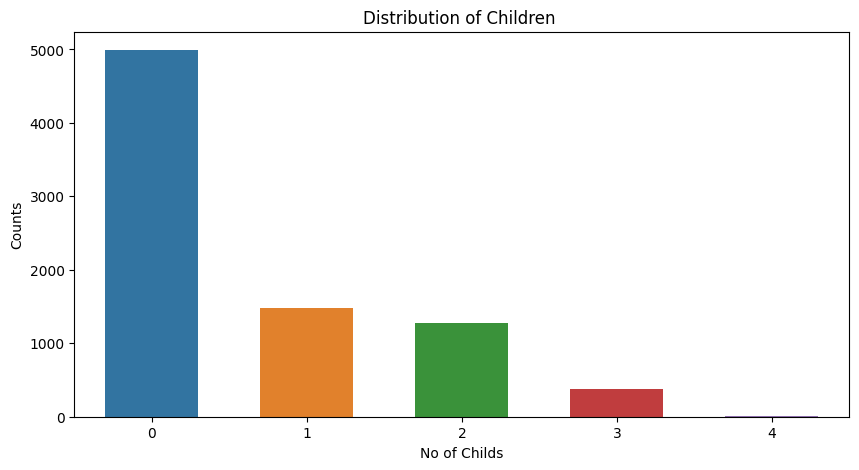

In [ ]:
paper = plt.figure(figsize=(10,5))
#data['children'].value_counts().plot.bar()
sns.barplot(x=data['children'].value_counts().index , y = data['children'].value_counts().values,width=0.6)
plt.title('Distribution of Children ')
plt.xlabel('No of Childs')
plt.ylabel('Counts')
plt.show()

**Observations**-

- Most of the people in our Dataset have No child.
- Very few with 4 or more Children.

**Question 2**:What is the distribution of Age Bands?Which age group has the highest number of customers?

In [ ]:
data['age_band'].value_counts()

45-50               1098
41-45                903
36-40                895
55-60                865
31-35                840
51-55                833
26-30                735
61-65                700
65-70                468
22-25                356
71+                  337
18-21                 50
Unknown_age_band      44
Name: age_band, dtype: int64

In [ ]:
#Lets plot them

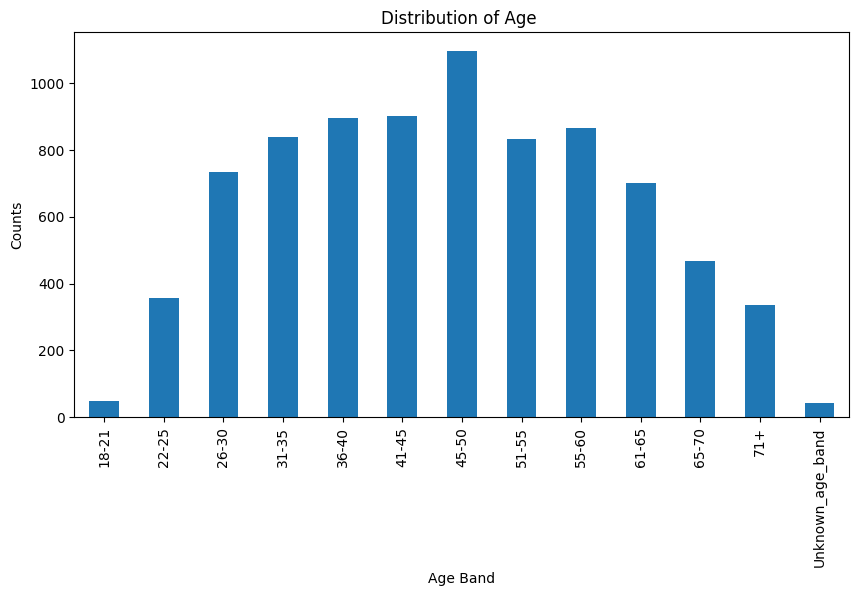

In [ ]:
paper = plt.figure(figsize=(10,5))
data['age_band'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Age ')
plt.xlabel('Age Band')
plt.ylabel('Counts')
plt.show()

**Observations**-
- Age Band feature is normally distributed.
- We have people from all Age Groupd.
- Maximum people are from 45-50 age group.
- We have Unknown Age_band as well

In [ ]:
data.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

**Question 3** : What is the Distribution of Marital status of People.

In [ ]:
data['status'].value_counts()

Partner                 6124
Single/Never Married     881
Divorced/Separated       569
Widowed                  510
Unknown_status            40
Name: status, dtype: int64

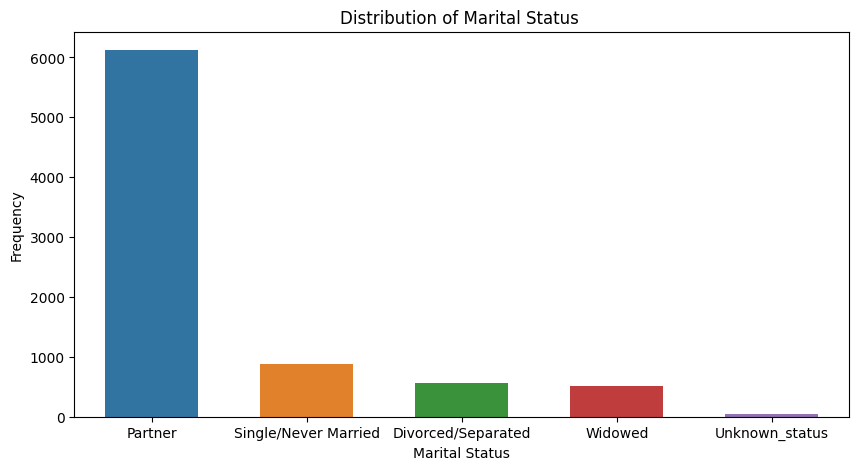

In [ ]:
paper = plt.figure(figsize=(10,5))
sns.barplot(x=data['status'].value_counts().index , y = data['status'].value_counts().values,width=0.6)
plt.title('Distribution of Marital Status ')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

**Observations** -
- Most of the people have Marital Status as Partner.
- Less all other status have very less counts.

**Question 5**: What are the different occupations people are into. Also compare it with the partner Occupations.

In [ ]:
data['occupation'].value_counts()

Professional          1949
Retired               1799
Secretarial/Admin     1435
Housewife              984
Business Manager       578
Manual Worker          451
Unknown_occupation     449
Other                  432
Student                 47
Name: occupation, dtype: int64

In [ ]:
data['occupation_partner'].value_counts()

Unknown_occupation_partner    1942
Professional                  1620
Retired                       1558
Manual Worker                 1222
Business Manager               575
Secretarial/Admin              510
Housewife                      422
Other                          261
Student                         14
Name: occupation_partner, dtype: int64

In [ ]:
#Lets plot both of them

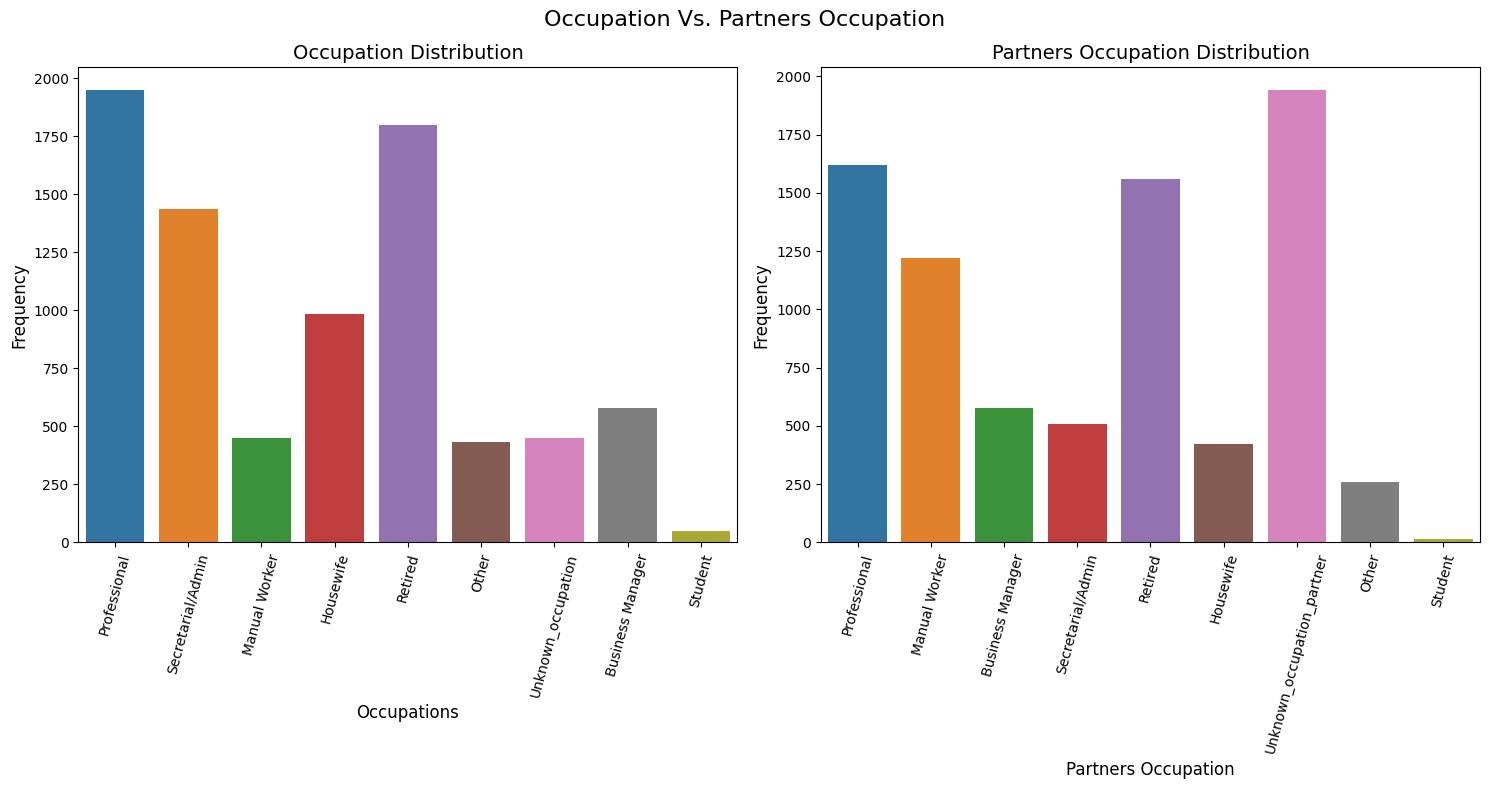

In [ ]:
paper = plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(x='occupation', data=data)
plt.title('Occupation Distribution',size=14)
plt.xlabel('Occupations',size=12)
plt.ylabel('Frequency',size=12)
plt.xticks(rotation =75)

plt.subplot(1,2,2)
space = np.ones(2)/10
sns.countplot(x='occupation_partner', data=data)
plt.title('Partners Occupation Distribution',size=14)
plt.xlabel('Partners Occupation',size=12)
plt.ylabel('Frequency',size=12)
plt.xticks(rotation =75)

plt.suptitle('Occupation Vs. Partners Occupation',size=16)
plt.tight_layout()
plt.show()

**Observations**:
- For both partners, Professional Occupation has a maximum number of people under its umbrella.
- We have a lot of Retired people.
- Very less students.
- We have a lots of Unknown values in Partner's Occupation.

**Question 6**: What is the distribution of Home Status of people in our Dataset?


In [ ]:
data.home_status.value_counts()

Own Home                7506
Rent from Council/HA     279
Rent Privately           205
Live in Parental Hom      90
Unclassified              44
Name: home_status, dtype: int64

<Axes: >

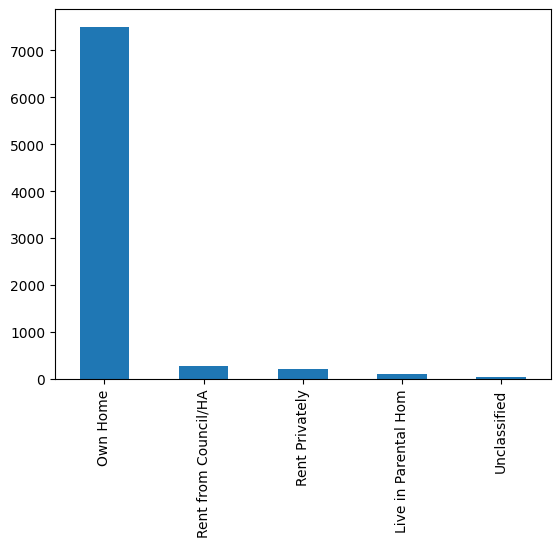

In [ ]:
data.home_status.value_counts().plot.bar()

**Observations**:
- Most people have there Own Home.
- Very less from other Categories.

**Question 7**: How is the "family_income" distributed among the customers? What is the average family income?

In [ ]:
data['family_income'].value_counts()

>=35,000                 2014
<27,500, >=25,000         969
<30,000, >=27,500         796
<25,000, >=22,500         656
<12,500, >=10,000         535
<20,000, >=17,500         525
<17,500, >=15,000         521
<15,000, >=12,500         508
<22,500, >=20,000         479
<10,000, >= 8,000         452
< 8,000, >= 4,000         328
< 4,000                   233
Unknown_family_income     108
Name: family_income, dtype: int64

In [ ]:
# Lets Plot them

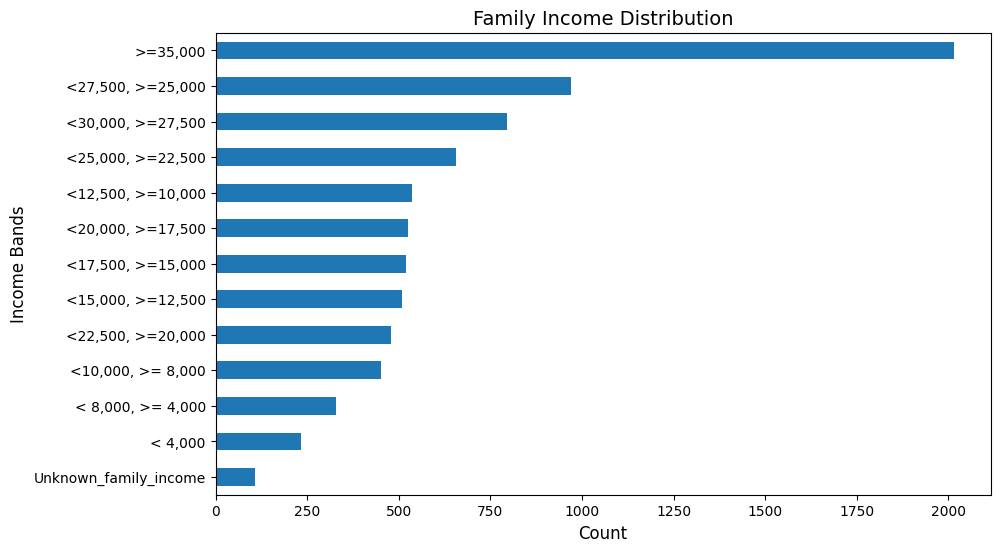

In [ ]:
paper = plt.figure(figsize=(10,6))
data['family_income'].value_counts().sort_values(ascending=True).plot.barh()
plt.title('Family Income Distribution',size=14)
plt.xlabel('Count',size=12)
plt.ylabel('Income Bands',size=12)
plt.show()

**Observations**:
- Most people have Family Income >= 35,000
- Very less people who have Income < 4000.

**Question 8** What is the percentage of customers who are self-employed and self-employed partners?

In [ ]:
#self_employed

In [ ]:
data['self_employed'].value_counts()

No     7543
Yes     581
Name: self_employed, dtype: int64

In [ ]:
#self-employed_partners

In [ ]:
data['self_employed_partner'].value_counts()

No     7207
Yes     917
Name: self_employed_partner, dtype: int64

In [ ]:
#Lets plot them to picture them clearly

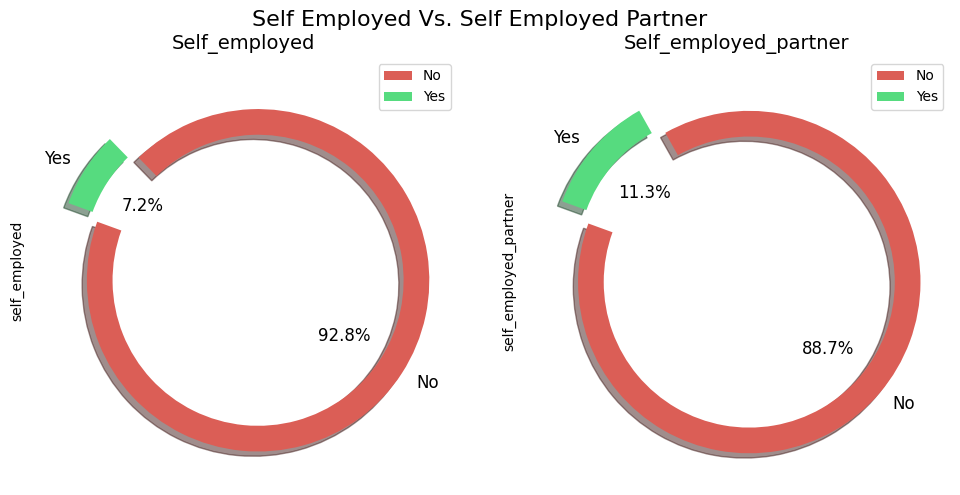

In [ ]:
paper = plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
data['self_employed'].value_counts().plot.pie(explode = space, fontsize = 12, autopct = '%3.1f%%', wedgeprops = dict(width=0.15),
                                       shadow = True, startangle = 160, figsize = [10, 5], legend = True, colors = ['#DB5E56','#56DB7F'])
plt.title('Self_employed',size=14)

plt.subplot(1,2,2)
space = np.ones(2)/10
data['self_employed_partner'].value_counts().plot.pie(explode = space, fontsize = 12, autopct = '%3.1f%%', wedgeprops = dict(width=0.15),
                                       shadow = True, startangle = 160, figsize = [10, 5], legend = True, colors = ['#DB5E56','#56DB7F'])
plt.title('Self_employed_partner',size=14)

plt.suptitle('Self Employed Vs. Self Employed Partner',size=16)
plt.tight_layout()
plt.show()

**Observations**:
- We can clearly see there are very less people who are Self
 Employed for both Spouce and Partner.

**Question 9**:What is the distribution of the "TVarea" regions? Which TV region has the most customers?

In [ ]:
data['TVarea'].value_counts()

Central           1294
Carlton           1237
Meridian           977
Yorkshire          847
Granada            824
HTV                683
Anglia             597
Tyne Tees          433
Scottish TV        406
TV South West      286
Grampian           175
Unknown_TVarea     154
Ulster             135
Border              76
Name: TVarea, dtype: int64

In [ ]:
# Lets plot them

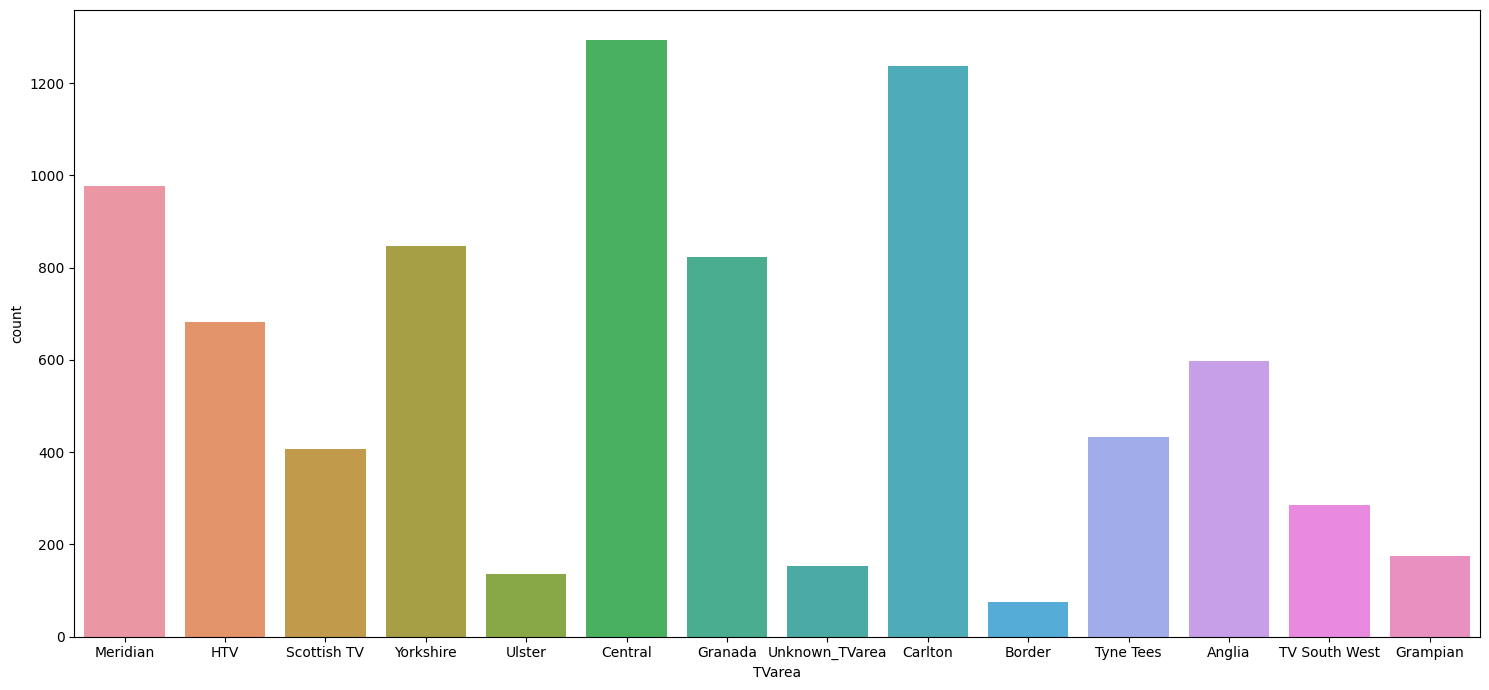

In [ ]:
paper = plt.figure(figsize=(15,7))
sns.countplot(x=data['TVarea'])
plt.tight_layout()
plt.show()


**Observations** -
- Central and Carlton have maximum users followed by Meridian .

**Question 10**: How many customers have a personal loan? What is the proportion of customers with a personal loan?

In [ ]:
data['Personal_Loan'].describe()

count   8124.00000
mean      25.41583
std       85.13015
min        0.00000
25%        0.00000
50%        0.00000
75%       20.82750
max     4905.93000
Name: Personal_Loan, dtype: float64

<Axes: >

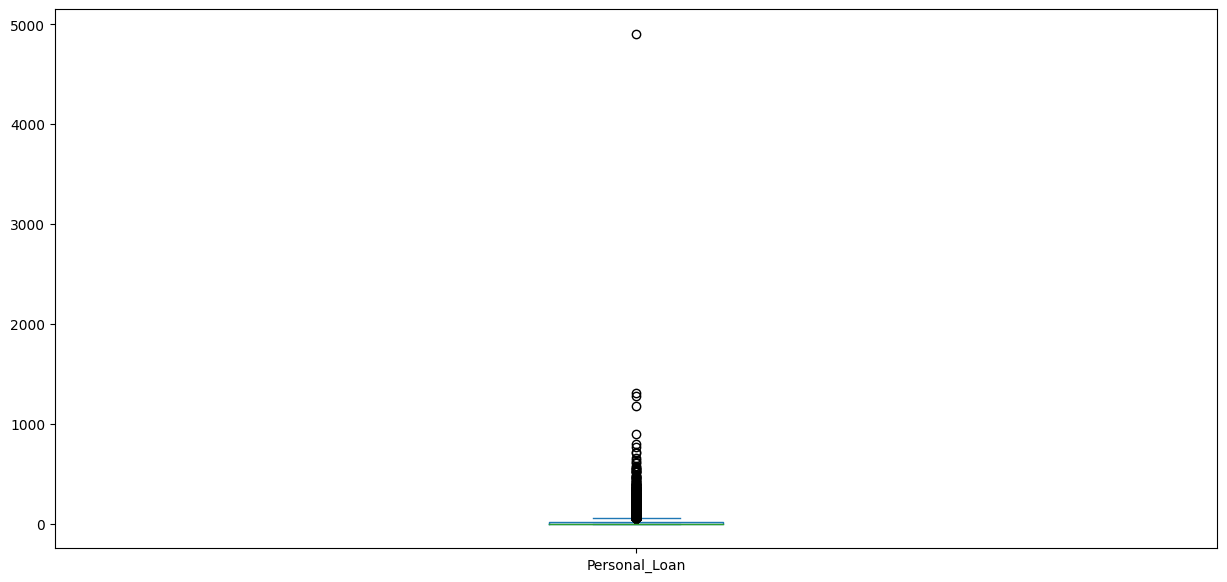

In [ ]:
paper = plt.figure(figsize=(15,7))
data['Personal_Loan'].plot.box()

**Observations**:
- 50% of the people does'nt have a personal Loan.
- We can clearly see we have outliers in the Personal Loan.
- Maximum Personal Loan is 4905.

**Question 11**:What is the distribution of the "region" feature? Which region has the highest number of customers?

In [ ]:
data['region'].value_counts()

South East          1680
North West          1517
Unknown_region       866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

<Axes: >

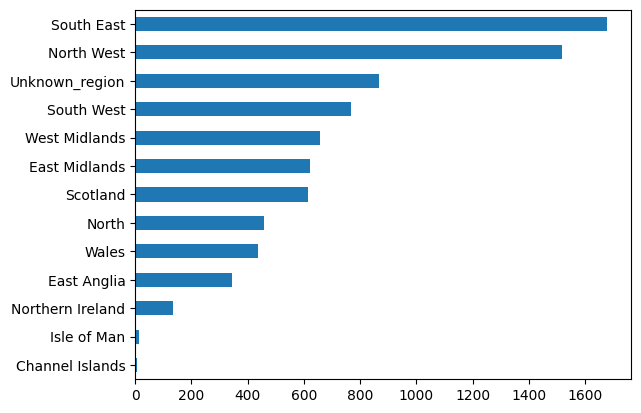

In [ ]:
data['region'].value_counts().sort_values().plot.barh()

**Observations**-
- Most of the people are from South East,followed by North West.

**Question 12**:How are the investment amounts in commodities, equity, and derivatives distributed?

In [ ]:
data.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [ ]:
data['Investment_in_Commudity'].describe()

count   8124.00000
mean      36.15275
std       42.47495
min        0.00000
25%        8.28250
50%       23.59000
75%       49.79500
max     1231.09000
Name: Investment_in_Commudity, dtype: float64

In [ ]:
data['Investment_in_Equity'].describe()

count   8124.00000
mean      21.44248
std       32.26166
min        0.00000
25%        4.66000
50%       12.82000
75%       27.97250
max     1279.10000
Name: Investment_in_Equity, dtype: float64

In [ ]:
data['Investment_in_Derivative'].describe()

count   8124.00000
mean      31.53065
std       39.48066
min        0.00000
25%        8.74000
50%       21.14000
75%       42.39250
max     1771.16000
Name: Investment_in_Derivative, dtype: float64

In [ ]:
#Lets plot them

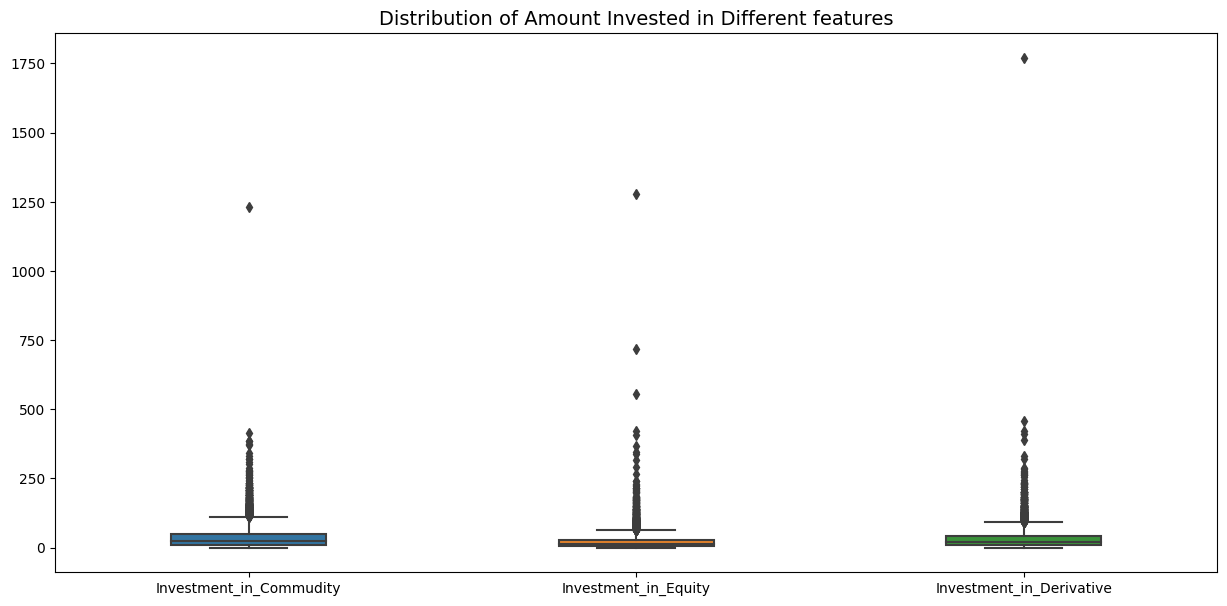

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=data[['Investment_in_Commudity', 'Investment_in_Equity', 'Investment_in_Derivative']], width=0.4)
plt.title('Distribution of Amount Invested in Different features',size=14)
plt.show()

**Observations**:
- There are potential outliers in all the 3 investemnt areas.
- Avg. Investment in Communidity is sligthly more than in Derivatives than in Equity

In [ ]:
#Bi-variate analysis

In [ ]:
#Lets plot a Hatmap to see the Co-relation among different features.

In [ ]:
corr = data.corr()

<Axes: >

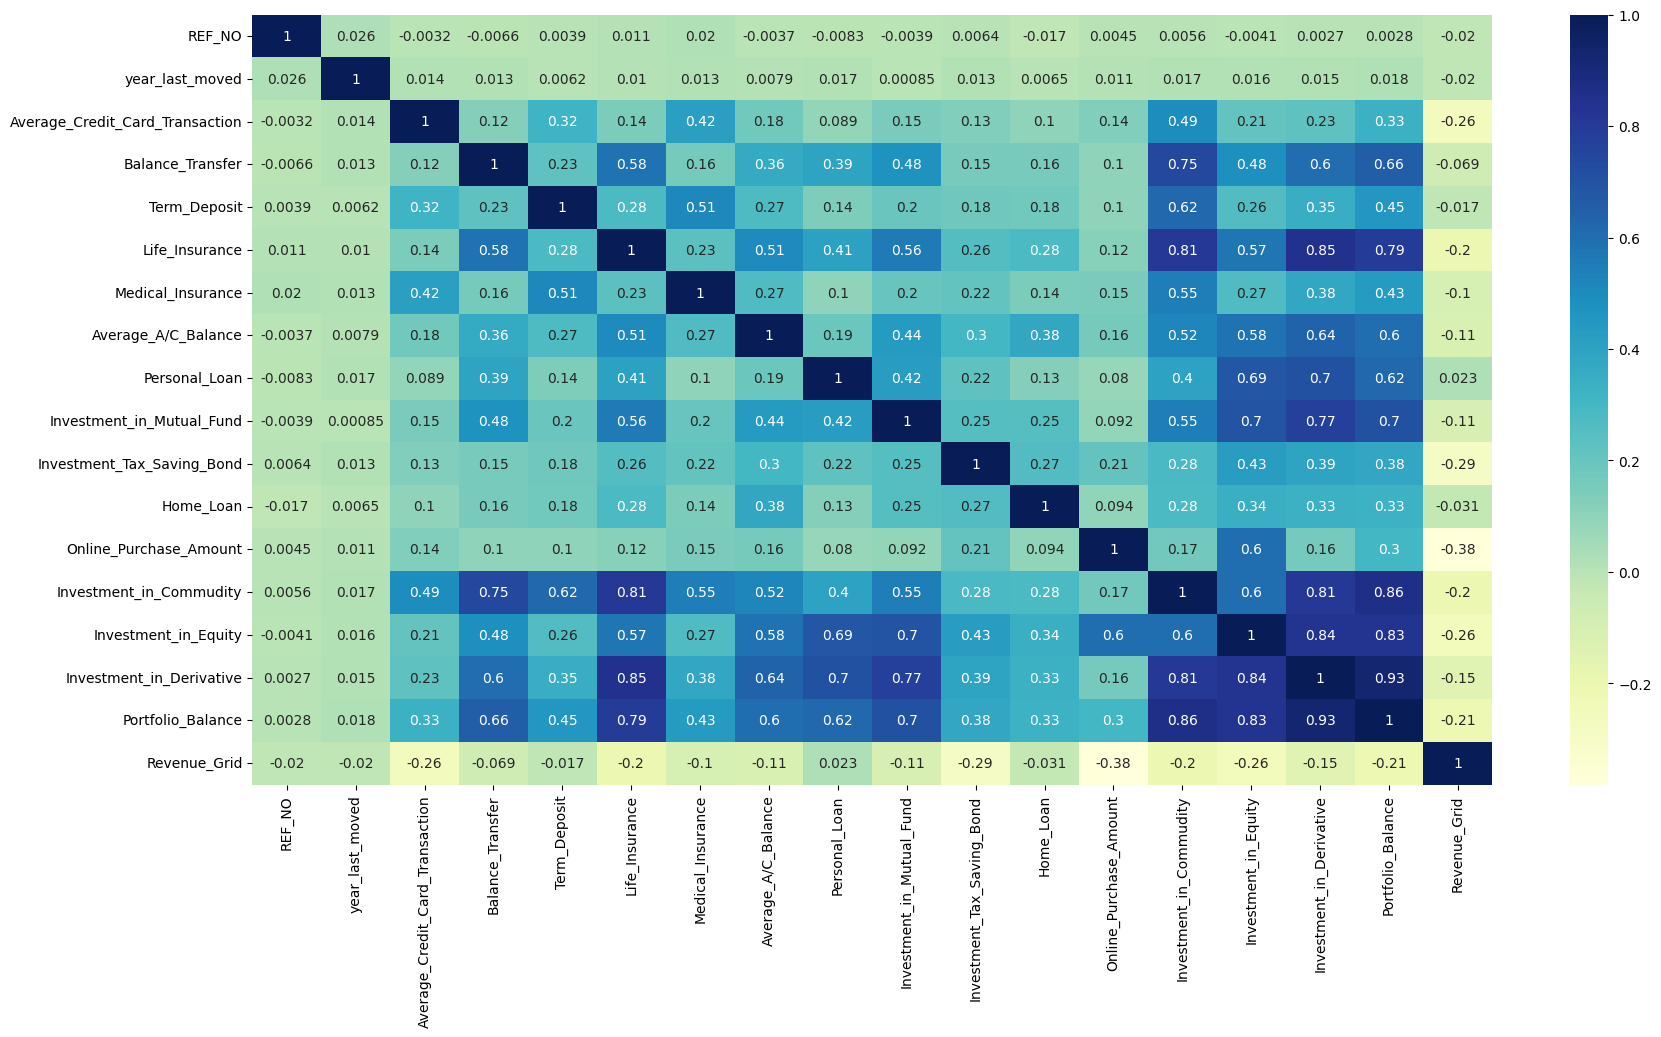

In [ ]:
paper = plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='YlGnBu')

**Observations**:
- Investment in Commudity is highly co-related with Balance Transfer,Life Insurance,Investment in Derivative and Portfolio Balance.
- Investment in Equity is highly co-related with Investment in Derivatives and Portfolio Balance.
- Portfolio balance is co-related with Life Insurance,Investment in Commudity and highly with Investment in Derivatives and Mutual Funds.
- Life Insurance is higly co-related with Investments in Derivatives and Commudity.


In [ ]:
#Lets define a function to check the chi2 contigency

In [ ]:
from scipy.stats import chi2_contingency
def chi_sq_test(var1, var2):
  cont_table = pd.crosstab(var1, var2)
  _, p, _, _ = chi2_contingency(cont_table, correction=False)
  print (cont_table)
  if p < 0.05:
    print('Accept the alternate Hypothesis/Reject the Null.  p values - ', round(p,2))
  else:
    print('Failed to reject the null Hypothesis/Accept the null.  p value - ', round(p,2))

**Question 13**:Does the age of the customer (age_band) have an impact on their Revenue Grid(High Net Worth/Low Net Worth)?

Relation between age_band and Revenue Grid

- Ho,Null Hypothesis : age_band and Revenue Grid are independent
- H1,Alternate : Both are Dependent are dependent.

In [ ]:
chi_sq_test(data['age_band'],data['Revenue_Grid'])

Revenue_Grid        1    2
age_band                  
18-21               8   42
22-25              40  316
26-30              75  660
31-35              86  754
36-40             111  784
41-45             102  801
45-50             110  988
51-55              85  748
55-60              97  768
61-65              66  634
65-70              46  422
71+                32  305
Unknown_age_band    2   42
Failed to reject the null Hypothesis/Accept the null.  p value -  0.63


**Observations** -
- Our Null Hypothesis is True, both are Independent

**Questio 14**: Do customers with higher investment in mutual funds tend to have higher portfolio balances?

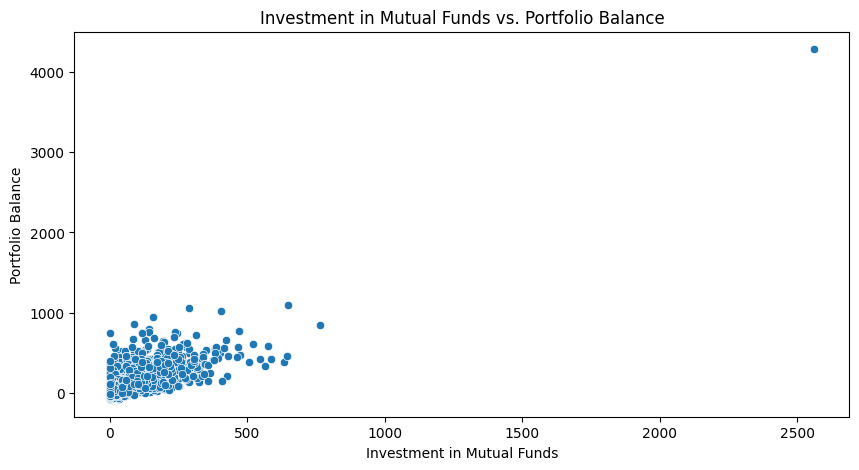

Pearson Correlation Coefficient: 0.7043816071157722


In [ ]:
investment_in_mutual_fund = data['Investment_in_Mutual_Fund']
portfolio_balance = data['Portfolio_Balance']

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 5))
sns.scatterplot(x=investment_in_mutual_fund, y=portfolio_balance)
plt.title('Investment in Mutual Funds vs. Portfolio Balance')
plt.xlabel('Investment in Mutual Funds')
plt.ylabel('Portfolio Balance')
plt.show()

# Calculate the Pearson correlation coefficient
correlation_coefficient = investment_in_mutual_fund.corr(portfolio_balance)
print("Pearson Correlation Coefficient:", correlation_coefficient)

**Observations**-
- Both of them are highly co-related.

In [ ]:
#Lets check the Categorical Varibales with the Output feature Revenue Grid

In [ ]:
data.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

**Question 14**: Is Revenue_Grid(High Net Worth/Low Net Worth)  dependent on Marital Status?  

Ho - Both are Independent.
H1 - Both are Dependent

In [ ]:
chi_sq_test(data['status'],data['Revenue_Grid'])

Revenue_Grid            1     2
status                         
Divorced/Separated     64   505
Partner               657  5467
Single/Never Married   91   790
Unknown_status          2    38
Widowed                46   464
Failed to reject the null Hypothesis/Accept the null.  p value -  0.54


**Observations** -
- Revenue Grid and Marital status are Independent features.

**Question 15**: Does Occupation defines the Net Worth Status of the person ? Similarly check for Partner's Occupation.

In [ ]:
#Lets check for Occupation and Revenue Grid

Ho - Both are Independent. H1 - Both are Dependent

In [ ]:
chi_sq_test(data['occupation'],data['Revenue_Grid'])

Revenue_Grid          1     2
occupation                   
Business Manager     71   507
Housewife            93   891
Manual Worker        48   403
Other                47   385
Professional        227  1722
Retired             180  1619
Secretarial/Admin   144  1291
Student               6    41
Unknown_occupation   44   405
Failed to reject the null Hypothesis/Accept the null.  p value -  0.53


In [ ]:
chi_sq_test(data['occupation_partner'],data['Revenue_Grid'])

Revenue_Grid                  1     2
occupation_partner                   
Business Manager             62   513
Housewife                    42   380
Manual Worker               125  1097
Other                        25   236
Professional                197  1423
Retired                     150  1408
Secretarial/Admin            60   450
Student                       1    13
Unknown_occupation_partner  198  1744
Failed to reject the null Hypothesis/Accept the null.  p value -  0.47


In [ ]:
#Since the p is high, we can conclude that both are Independent

In [ ]:
chi_sq_test(data['region'],data['Revenue_Grid'])

Revenue_Grid        1     2
region                     
Channel Islands     1     4
East Anglia        43   301
East Midlands      55   568
Isle of Man         0    15
North              39   421
North West        160  1357
Northern Ireland   16   119
Scotland           68   547
South East        180  1500
South West         70   699
Unknown_region    100   766
Wales              51   386
West Midlands      77   581
Failed to reject the null Hypothesis/Accept the null.  p value -  0.43


**Question 16**: Does the home_status defines the Net Worth of a person?

In [ ]:
chi_sq_test(data['home_status'],data['Revenue_Grid'])

Revenue_Grid            1     2
home_status                    
Live in Parental Hom   10    80
Own Home              792  6714
Rent Privately         20   185
Rent from Council/HA   35   244
Unclassified            3    41
Failed to reject the null Hypothesis/Accept the null.  p value -  0.74


**Observations**-
- alone home_status cannot define a Person Net Worth that obvious.

**Question 17**:Are self-employed customers more likely to have a higher balance transfer amount than non-self-employed customers?


In [ ]:
data.head(2)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,Female,North West,151.55000,81.79000,136.02000,360.37000,2
1,9091,0,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,Female,North West,44.28000,13.91000,29.23000,89.22000,2


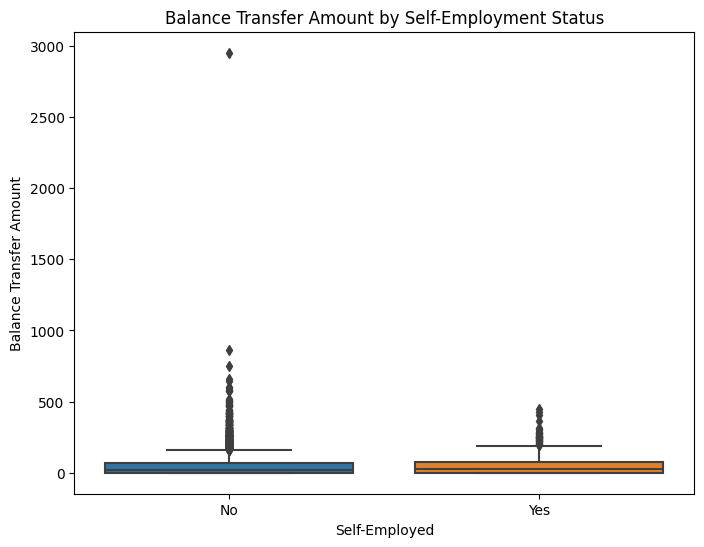

In [ ]:
self_employed_balance = data[data['self_employed'] == 'Yes']['Balance_Transfer']
non_self_employed_balance = data[data['self_employed'] == 'No']['Balance_Transfer']

# Create box plots to visualize the distribution of balance transfer amounts
plt.figure(figsize=(8, 6))
sns.boxplot(x='self_employed', y='Balance_Transfer', data=data)
plt.title('Balance Transfer Amount by Self-Employment Status')
plt.xlabel('Self-Employed')
plt.ylabel('Balance Transfer Amount')
plt.show()

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---
- Now we will **perform encoding of the categorical columns** and **feed it** to the **LogisticRegression**.

<a name = Section71></a>
### **7.1 Feature Selection**

In [ ]:
#Lets drop uncessary features like 'REF_NO,year_last_moved,post_code,post_area,region.Rest We will keep all the features as of now.

In [ ]:
data.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [ ]:
data.drop(['REF_NO','year_last_moved','post_code','post_area','gender','status','region'],axis=1,inplace=True)

In [ ]:
data.head(2)

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,2,31-35,Professional,Professional,Own Home,">=35,000",No,No,Meridian,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,151.55000,81.79000,136.02000,360.37000,2
1,0,45-50,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,Meridian,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,44.28000,13.91000,29.23000,89.22000,2


In [ ]:
data[data['Personal_Loan'] >= 2000]

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
3621,1,41-45,Professional,Professional,Own Home,">=35,000",No,No,Tyne Tees,0.00000,2951.76000,251.33000,2930.41000,21.96000,197.90000,4905.93000,2561.27000,9.48000,0.00000,0.00000,1231.09000,1279.10000,1771.16000,4283.56000,2


In [ ]:
data[data['Online_Purchase_Amount'] > 2000]

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
4235,1,41-45,Other,Unknown_occupation_partner,Own Home,"<22,500, >=20,000",No,Yes,Yorkshire,0.00000,72.95000,210.86000,54.43000,11.99000,99.37000,83.48000,19.95000,156.87000,17.64000,2142.62000,70.05000,419.99000,71.02000,563.17000,1
6404,1,45-50,Business Manager,Manual Worker,Own Home,">=35,000",No,No,Granada,0.00000,34.48000,0.00000,58.46000,0.00000,0.00000,26.98000,14.49000,0.00000,0.00000,2033.85000,18.59000,345.89000,16.66000,355.02000,1
7609,0,26-30,Professional,Manual Worker,Own Home,">=35,000",No,Yes,Granada,19.99000,0.03000,49.98000,53.93000,124.95000,110.88000,254.75000,117.35000,41.34000,3.99000,2808.80000,49.78000,556.19000,117.20000,745.07000,1


In [ ]:
data = data[data['Online_Purchase_Amount'] <= 2000]

In [ ]:
data = data[data['Personal_Loan'] < 2000]

In [ ]:
data.skew()

children                           1.18372
Average_Credit_Card_Transaction    3.75992
Balance_Transfer                   2.72822
Term_Deposit                       4.18456
Life_Insurance                     2.64582
Medical_Insurance                  3.36451
Average_A/C_Balance                2.69394
Personal_Loan                      6.47478
Investment_in_Mutual_Fund          3.16009
Investment_Tax_Saving_Bond         3.07034
Home_Loan                          3.97789
Online_Purchase_Amount             9.35653
Investment_in_Commudity            2.43020
Investment_in_Equity               3.65870
Investment_in_Derivative           2.92568
Portfolio_Balance                  2.35206
Revenue_Grid                      -2.57004
dtype: float64

In [ ]:
data['Total Insurance'] = data['Life_Insurance'] + data['Medical_Insurance']
data['Total Investments'] = data['Investment_in_Mutual_Fund'] + data['Investment_in_Commudity'] + data['Investment_in_Equity'] + data['Investment_in_Derivative']

In [ ]:
data.drop(['Life_Insurance','Medical_Insurance','Investment_in_Mutual_Fund','Investment_in_Commudity','Investment_in_Equity','Investment_in_Derivative'],axis=1,inplace=True)

In [ ]:
data['Total Investments New'] = data['Total Investments'] + data['Investment_Tax_Saving_Bond']

In [ ]:
data.drop(['Total Investments','Investment_Tax_Saving_Bond'],axis=1,inplace=True)

In [ ]:
data.head()

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Personal_Loan,Home_Loan,Online_Purchase_Amount,Portfolio_Balance,Revenue_Grid,Total Insurance,Total Investments New
0,2,31-35,Professional,Professional,Own Home,">=35,000",No,No,Meridian,26.98000,29.99000,312.25000,108.85000,175.43000,55.44000,7.68000,360.37000,2,388.51000,512.69000
1,0,45-50,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,Meridian,35.98000,74.48000,0.00000,48.45000,15.99000,0.00000,18.99000,89.22000,2,110.95000,87.42000
2,1,36-40,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,HTV,0.00000,24.46000,0.00000,0.00000,0.02000,0.00000,0.00000,14.50000,2,18.44000,25.61000
3,2,31-35,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,Scottish TV,44.99000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,68.98000,2,29.99000,20.00000
4,0,55-60,Housewife,Professional,Own Home,">=35,000",No,No,Yorkshire,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.88000,2,0.00000,13.30000


<a name = Section73></a>
### **7.2 Encoding Categorical Features**

In [ ]:
#Lets Look at Our Categorical Features

In [ ]:
data.select_dtypes(include=object).head()

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea
0,2,31-35,Professional,Professional,Own Home,">=35,000",No,No,Meridian
1,0,45-50,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,Meridian
2,1,36-40,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,HTV
3,2,31-35,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,Scottish TV
4,0,55-60,Housewife,Professional,Own Home,">=35,000",No,No,Yorkshire


In [ ]:
#Since all of the features have some inherited order/there are just 2 values(Yes/No) we can apply Label Encoder to each Cat Variable

In [ ]:
data.select_dtypes(include=object).columns

Index(['children', 'age_band', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'TVarea'],
      dtype='object')

In [ ]:
cat_features = ['children','age_band','occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed','self_employed_partner',
        'TVarea']

In [ ]:
data.head()

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Personal_Loan,Home_Loan,Online_Purchase_Amount,Portfolio_Balance,Revenue_Grid,Total Insurance,Total Investments New
0,2,3,4,4,1,11,0,No,Meridian,26.98000,29.99000,312.25000,108.85000,175.43000,55.44000,7.68000,360.37000,2,388.51000,512.69000
1,0,6,6,4,1,11,0,No,Meridian,35.98000,74.48000,0.00000,48.45000,15.99000,0.00000,18.99000,89.22000,2,110.95000,87.42000
2,1,4,2,2,2,7,1,Yes,HTV,0.00000,24.46000,0.00000,0.00000,0.02000,0.00000,0.00000,14.50000,2,18.44000,25.61000
3,2,3,2,2,1,8,0,No,Scottish TV,44.99000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,68.98000,2,29.99000,20.00000
4,0,8,1,4,1,11,0,No,Yorkshire,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.88000,2,0.00000,13.30000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in cat_features:
  data[col] = le.fit_transform(data[col])

<a name = Section73></a>
### **7.3 Data Standardization**

In [ ]:
#Now lets see our Continous Variables

In [ ]:
num_features = ['Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit','Total Insurance','Average_A/C_Balance','Personal_Loan','Home_Loan','Online_Purchase_Amount','Total Investments New','Portfolio_Balance']

In [ ]:
#Lets standardize our Numerical features using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])

In [ ]:
data.head(2)

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Personal_Loan,Home_Loan,Online_Purchase_Amount,Portfolio_Balance,Revenue_Grid,Total Insurance,Total Investments New
0,2,3,4,4,1,11,0,0,7,0.07266,-0.21798,5.27320,1.70427,2.29481,5.12962,-0.15550,2.79954,2,2.95854,2.61532
1,0,6,6,4,1,11,0,0,7,0.24859,0.39799,-0.50396,0.36815,-0.13393,-0.44406,0.01795,0.00656,2,0.26365,-0.33580


In [ ]:
#Our Data is now ready

<a name = Section74></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [ ]:
data.head(2)

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,2,3,4,4,1,11,0,0,7,0.07266,-0.21798,5.27320,2.59891,2.18395,1.70427,2.29481,1.60127,0.23446,5.12962,-0.15550,2.86298,2.26551,3.04131,2.79954,2
1,0,6,6,4,1,11,0,0,7,0.24859,0.39799,-0.50396,0.38720,-0.24458,0.36815,-0.13393,-0.71359,-0.48056,-0.44406,0.01795,0.20501,-0.26618,-0.06032,0.00656,2


In [ ]:
#data.drop(['self_employed','home_status'],axis=1,inplace=True)

In [ ]:
#Lets devide our Data into x and y

In [ ]:
x = data.drop(['Revenue_Grid'],axis=1)
y = data['Revenue_Grid']

In [ ]:
#Lets split our data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=15)

In [ ]:
print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (6495, 19) (6495,)
Testing Data Shape: (1624, 19) (1624,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---


In [ ]:
#Lets apply Logistic Regression

<a name = Section81></a>

## **8.1 Logistic Regression**

In [ ]:
lr=LogisticRegression()

In [ ]:
#Lets fit our model with x_train and y_train

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)

<a name = Section82></a>

## **8.2  Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score

In [ ]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  f_score = f1_score(actual,predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)
  print('f1 score is :',f_score)

In [ ]:
model_eval(y_train,preds_lr_train)

Model Accuracy is:  0.94
[[ 351  325]
 [  74 5745]]
              precision    recall  f1-score   support

           1       0.83      0.52      0.64       676
           2       0.95      0.99      0.97      5819

    accuracy                           0.94      6495
   macro avg       0.89      0.75      0.80      6495
weighted avg       0.93      0.94      0.93      6495

f1 score is : 0.6376021798365122


In [ ]:
model_eval(y_test, preds_lr_test)

Model Accuracy is:  0.94
[[  83   97]
 [   8 1436]]
              precision    recall  f1-score   support

           1       0.91      0.46      0.61       180
           2       0.94      0.99      0.96      1444

    accuracy                           0.94      1624
   macro avg       0.92      0.73      0.79      1624
weighted avg       0.93      0.94      0.93      1624

f1 score is : 0.6125461254612546


<a name = Section83></a>

## **8.3 Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Apply Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [ ]:
model_eval(y_train,preds_dtree_train)

Model Accuracy is:  1.0
[[ 676    0]
 [   0 5819]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       676
           2       1.00      1.00      1.00      5819

    accuracy                           1.00      6495
   macro avg       1.00      1.00      1.00      6495
weighted avg       1.00      1.00      1.00      6495

f1 score is : 1.0


In [ ]:
model_eval(y_test,preds_dtree_test)

Model Accuracy is:  0.92
[[ 110   70]
 [  58 1386]]
              precision    recall  f1-score   support

           1       0.65      0.61      0.63       180
           2       0.95      0.96      0.96      1444

    accuracy                           0.92      1624
   macro avg       0.80      0.79      0.79      1624
weighted avg       0.92      0.92      0.92      1624

f1 score is : 0.6321839080459771


In [ ]:
importances = list(zip(dtree.feature_importances_, x_train.columns))
importances.sort(reverse=True)
print(importances)


[(0.33927587015218635, 'Online_Purchase_Amount'), (0.10862460273651735, 'Total Insurance'), (0.10458602848396092, 'Average_Credit_Card_Transaction'), (0.08783772892805262, 'Total Investments New'), (0.08557685210239392, 'Term_Deposit'), (0.05839447096088426, 'Personal_Loan'), (0.04510896504620704, 'Average_A/C_Balance'), (0.04047770873335852, 'Portfolio_Balance'), (0.030678978214099137, 'Balance_Transfer'), (0.026789093091956474, 'Home_Loan'), (0.023404282479415933, 'TVarea'), (0.011688674901225793, 'occupation_partner'), (0.011569333159506838, 'occupation'), (0.00986528001969411, 'family_income'), (0.0062276209901612764, 'children'), (0.003481460552226034, 'age_band'), (0.0031096781271221217, 'home_status'), (0.0021770960750023553, 'self_employed_partner'), (0.0011262752460290497, 'self_employed')]


<a name = Section84></a>

# **8.4 Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=50,verbose=2)
rf.fit(x_train, y_train)

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


RandomForestClassifier(n_estimators=50, verbose=2)

In [ ]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [ ]:
model_eval(y_train, preds_rf_train)

Model Accuracy is:  1.0
[[ 675    1]
 [   0 5819]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       676
           2       1.00      1.00      1.00      5819

    accuracy                           1.00      6495
   macro avg       1.00      1.00      1.00      6495
weighted avg       1.00      1.00      1.00      6495

f1 score is : 0.999259807549963


In [ ]:
model_eval(y_test, preds_rf_test)

Model Accuracy is:  0.95
[[ 102   78]
 [   6 1438]]
              precision    recall  f1-score   support

           1       0.94      0.57      0.71       180
           2       0.95      1.00      0.97      1444

    accuracy                           0.95      1624
   macro avg       0.95      0.78      0.84      1624
weighted avg       0.95      0.95      0.94      1624

f1 score is : 0.7083333333333334


In [ ]:
#We can Remove Certain Features and lets see If our Accuracy Increases.

In [ ]:
data.head()

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Personal_Loan,Home_Loan,Online_Purchase_Amount,Portfolio_Balance,Revenue_Grid,Total Insurance,Total Investments New
0,2,3,4,4,1,11,0,0,7,0.07266,-0.21798,5.27320,1.70427,2.29481,5.12962,-0.15550,2.79954,2,2.95854,2.61532
1,0,6,6,4,1,11,0,0,7,0.24859,0.39799,-0.50396,0.36815,-0.13393,-0.44406,0.01795,0.00656,2,0.26365,-0.33580
2,1,4,2,2,2,7,1,1,6,-0.45473,-0.29455,-0.50396,-0.70362,-0.37720,-0.44406,-0.27328,-0.76310,2,-0.63454,-0.76472
3,2,3,2,2,1,8,0,0,8,0.42471,-0.63320,-0.50396,-0.70362,-0.37751,-0.44406,-0.27328,-0.20193,2,-0.52240,-0.80365
4,0,8,1,4,1,11,0,0,13,-0.45473,-0.63320,-0.50396,-0.70362,-0.37751,-0.44406,-0.27328,-0.89309,2,-0.81358,-0.85015


**Conclusion**:
- We can see Random Forest and Decision Tree have high Model Accuracy but we will choose Logistic Regression as we can see RF and DT are overfitting.
- We saw which features are  Important for Defining a Person's NetWorth Staus High/Low.
- Further we can improve our Model Accuracy by deleting few other features which are co-related with others.

<a name = Section9></a>

---
# **9. Model Deployment on Real Test Dataset**
---

In [ ]:
test_df = pd.read_csv('/content/existing_base_test.csv')
sub =pd.read_csv('/content/sample_submission.csv')

In [ ]:

print(test_df.shape)
test_df.head()

(2031, 31)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,1973,Meridian,BH21 2JQ,BH21,41.98000,55.47000,24.99000,29.98000,49.98000,44.47000,0.00000,45.97000,0.00000,0.00000,0.00000,Male,South West,40.48000,15.07000,28.40000,83.05000
1,7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,1996,Anglia,CM6 3QS,CM6,0.00000,0.00000,0.00000,99.91000,35.42000,29.49000,170.31000,133.88000,27.45000,13.47000,57.46000,Male,South East,27.07000,72.01000,82.74000,235.29000
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,1958,HTV,BA12 9JW,BA12,0.00000,154.47000,0.00000,67.47000,0.00000,87.83000,0.00000,107.88000,0.00000,0.00000,0.00000,Female,South West,44.39000,32.62000,43.86000,98.38000
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,1993,Grampian,AB22 8SP,AB22,18.98000,60.98000,0.00000,17.99000,9.99000,0.00000,102.43000,44.96000,0.00000,0.00000,0.00000,Female,Scotland,21.59000,24.57000,29.23000,86.32000
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1976,Meridian,PO37 6AD,PO37,0.00000,144.90000,0.00000,123.38000,0.00000,32.98000,0.00000,33.96000,6.99000,17.93000,5.45000,Female,South East,53.66000,16.22000,32.89000,102.99000


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           2031 non-null   int64  
 1   children                         2031 non-null   object 
 2   age_band                         2031 non-null   object 
 3   status                           2031 non-null   object 
 4   occupation                       2031 non-null   object 
 5   occupation_partner               2031 non-null   object 
 6   home_status                      2031 non-null   object 
 7   family_income                    2031 non-null   object 
 8   self_employed                    2031 non-null   object 
 9   self_employed_partner            2031 non-null   object 
 10  year_last_moved                  2031 non-null   int64  
 11  TVarea                           2031 non-null   object 
 12  post_code           

In [ ]:
ref_number = test_df['REF_NO']

In [ ]:
new_test_df = test_df.drop(['REF_NO','year_last_moved','post_code','post_area','gender','status','region'],axis=1)

In [ ]:
new_test_df.head()

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,Zero,71+,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,Meridian,41.98000,55.47000,24.99000,29.98000,49.98000,44.47000,0.00000,45.97000,0.00000,0.00000,0.00000,40.48000,15.07000,28.40000,83.05000
1,Zero,31-35,Unknown,Business Manager,Own Home,">=35,000",No,No,Anglia,0.00000,0.00000,0.00000,99.91000,35.42000,29.49000,170.31000,133.88000,27.45000,13.47000,57.46000,27.07000,72.01000,82.74000,235.29000
2,Zero,71+,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,HTV,0.00000,154.47000,0.00000,67.47000,0.00000,87.83000,0.00000,107.88000,0.00000,0.00000,0.00000,44.39000,32.62000,43.86000,98.38000
3,1,22-25,Other,Other,Own Home,"<17,500, >=15,000",No,No,Grampian,18.98000,60.98000,0.00000,17.99000,9.99000,0.00000,102.43000,44.96000,0.00000,0.00000,0.00000,21.59000,24.57000,29.23000,86.32000
4,Zero,65-70,Retired,Unknown,Own Home,"< 4,000",No,No,Meridian,0.00000,144.90000,0.00000,123.38000,0.00000,32.98000,0.00000,33.96000,6.99000,17.93000,5.45000,53.66000,16.22000,32.89000,102.99000


In [ ]:
new_test_df['children'] = new_test_df['children'].replace('Zero', '0')
new_test_df['children'] = new_test_df['children'].replace('4+','4')

In [ ]:
unknown_mask = (new_test_df == 'Unknown')

# Creating a DataFrame that shows the count of 'Unknown' values in each column
unknown_count = unknown_mask.sum()

# Filter out columns with at least one 'Unknown' value
columns_with_unknown = unknown_count[unknown_count > 0].index.tolist()

print("Columns with 'Unknown' values:")
print(columns_with_unknown)

Columns with 'Unknown' values:
['age_band', 'occupation', 'occupation_partner', 'family_income', 'TVarea']


In [ ]:
columns_with_unknown_test = ['age_band', 'occupation', 'occupation_partner', 'family_income', 'TVarea']

for col in columns_with_unknown_test:
    new_test_df[col] = new_test_df[col].replace('Unknown', 'Unknown_' + col)

In [ ]:
new_test_df.head(2)

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,0,71+,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,Meridian,41.98000,55.47000,24.99000,29.98000,49.98000,44.47000,0.00000,45.97000,0.00000,0.00000,0.00000,40.48000,15.07000,28.40000,83.05000
1,0,31-35,Unknown_occupation,Business Manager,Own Home,">=35,000",No,No,Anglia,0.00000,0.00000,0.00000,99.91000,35.42000,29.49000,170.31000,133.88000,27.45000,13.47000,57.46000,27.07000,72.01000,82.74000,235.29000


In [ ]:
cat_features = ['children','age_band','occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'TVarea']

In [ ]:
for col in cat_features:
  new_test_df[col]=le.fit_transform(new_test_df[col])

In [ ]:
scaler = StandardScaler()
new_test_df[num_features] = scaler.fit_transform(new_test_df[num_features])

In [ ]:
new_test_df.head(2)

,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,0,11,5,1,1,3,0,0,7,0.35731,0.10150,-0.07087,-0.42248,0.86763,0.24558,-0.35140,0.01889,-0.47061,-0.46840,-0.24369,0.05475,-0.25212,-0.14449,-0.11505
1,0,3,8,0,1,11,0,0,0,-0.48654,-0.62850,-0.54055,0.31688,0.44048,-0.07720,1.75835,1.44309,1.56975,0.86202,0.49253,-0.26915,1.62358,1.30396,1.36458


In [ ]:
predictions_lr = lr.predict(new_test_df)

In [ ]:
submission_df = pd.DataFrame({'REF_NO': ref_number, 'Revenue_Grid': predictions_lr})

In [ ]:
submission_df['Revenue_Grid'].value_counts()

2    1878
1     153
Name: Revenue_Grid, dtype: int64

In [ ]:
print(submission_df.shape)
submission_df.head()

(2031, 2)


,REF_NO,Revenue_Grid
0,697,2
1,7897,2
2,4729,2
3,6914,2
4,2795,2


In [ ]:
#submission_df.to_csv('customer_classification_submission.csv', index=False, header=False)